# ข้อ 6: ตรวจหาเส้นตรงด้วย Hough Lines

Notebook นี้ใช้สำหรับตรวจหาเส้นตรงจากภาพขอบ (Edge Image) และวาดเส้นสีแดง พร้อมนับจำนวนเส้นตรงที่พบ

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

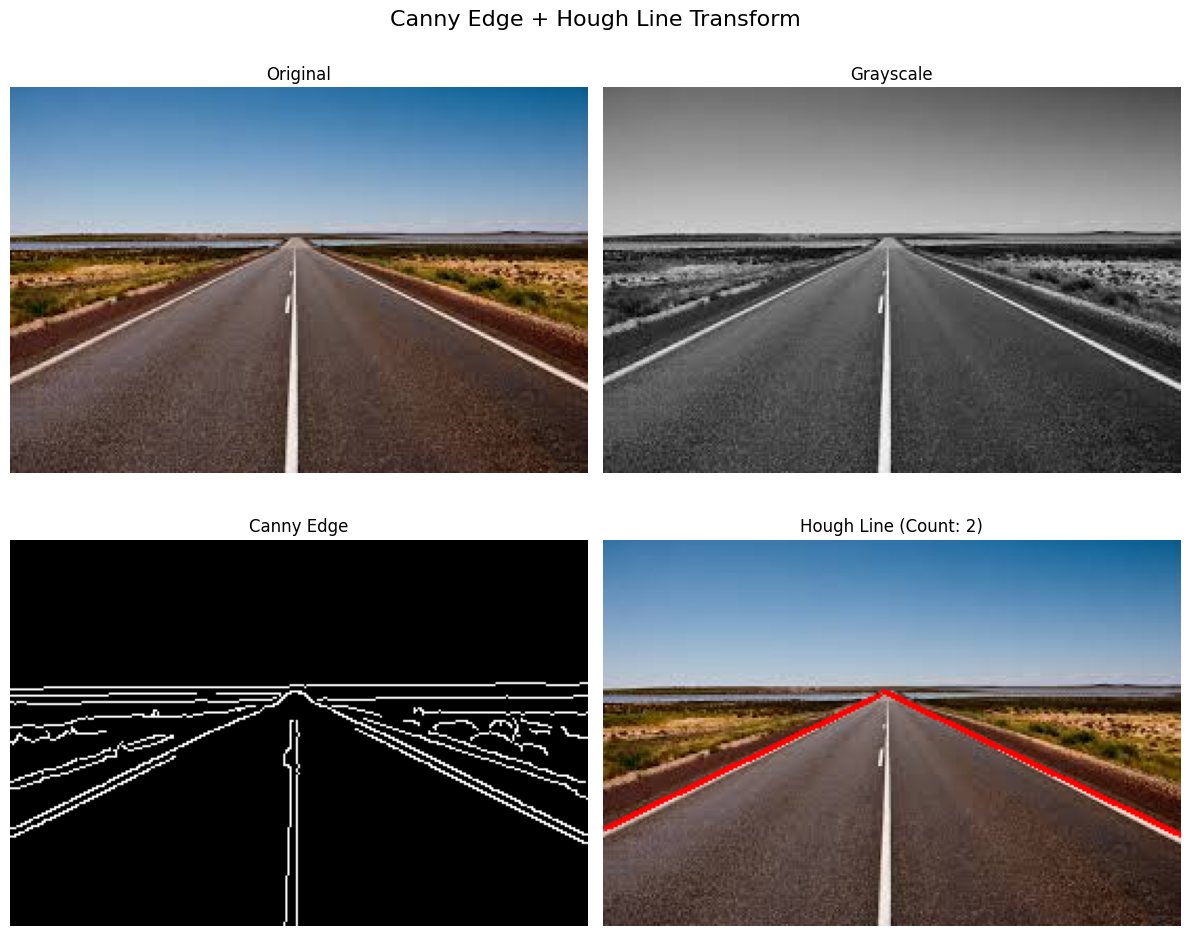

In [6]:
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

def canny_edge_detection(gray_image):
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 1.4)
    edges = cv2.Canny(blurred, threshold1=100, threshold2=200)
    #edges = cv2.Canny(edges, threshold1=100, threshold2=200)
    return edges

def hough_line_detection(edge_image, original_image):
    lines = cv2.HoughLinesP(
        edge_image,
        rho=1,
        theta=np.pi / 180,
        threshold=100,
        minLineLength=100,
        maxLineGap=10
    )

    result = original_image.copy()
    line_count = 0  # ตัวแปรสำหรับเก็บจำนวนเส้น

    if lines is not None:
        line_count = len(lines)  # 1. นับจำนวนเส้นที่เจอ
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return result, line_count # ส่งค่าจำนวนเส้นกลับไปด้วย

def process_image(image_path, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    original, gray = load_and_convert_to_grayscale(image_path)
    if gray is None:
        return

    edges = canny_edge_detection(gray)
    hough_img, count = hough_line_detection(edges, original)

    results = {
        "Original": cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
        "Grayscale": gray,
        "Canny Edge": edges,
        f"Hough Line (Count: {count})": cv2.cvtColor(hough_img, cv2.COLOR_BGR2RGB)
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Canny Edge + Hough Line Transform", fontsize=16)

    for ax, (title, img) in zip(axes.ravel(), results.items()):
        cmap = 'gray' if len(img.shape) == 2 else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"hough_{os.path.basename(image_path)}")
    plt.savefig(save_path)
    plt.show()

if __name__ == "__main__":
    image_path = "C:\\Users\\enjoykubphom\\Documents\\GitHub\\Mini_Visionv1\\img\\line2.jpg"   # เปลี่ยนเป็นรูปของคุณ
    process_image(image_path)

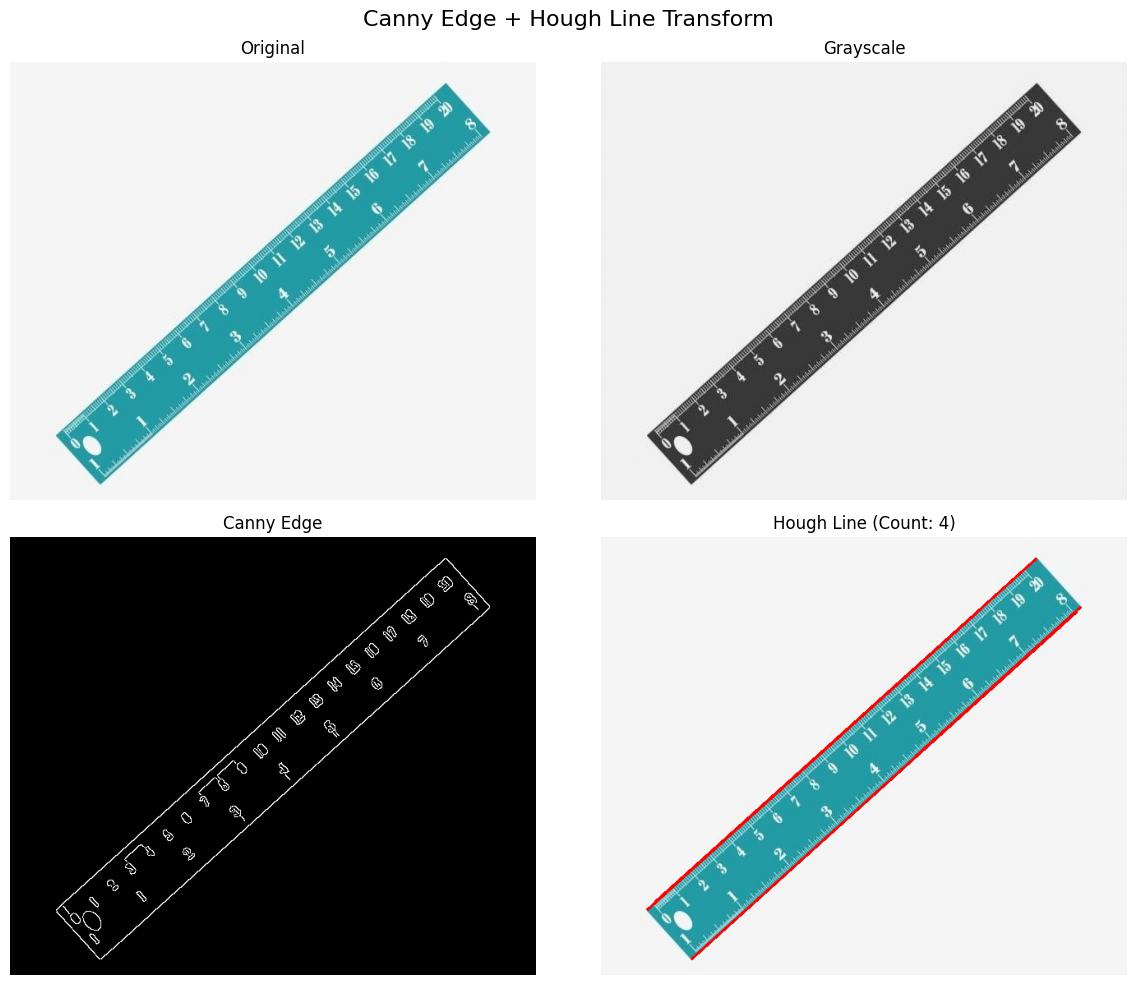

In [8]:
if __name__ == "__main__":
    image_path = "C:\\Users\\enjoykubphom\\Documents\\GitHub\\Mini_Visionv1\\img\\line4.jpg"   # เปลี่ยนเป็นรูปของคุณ
    process_image(image_path)

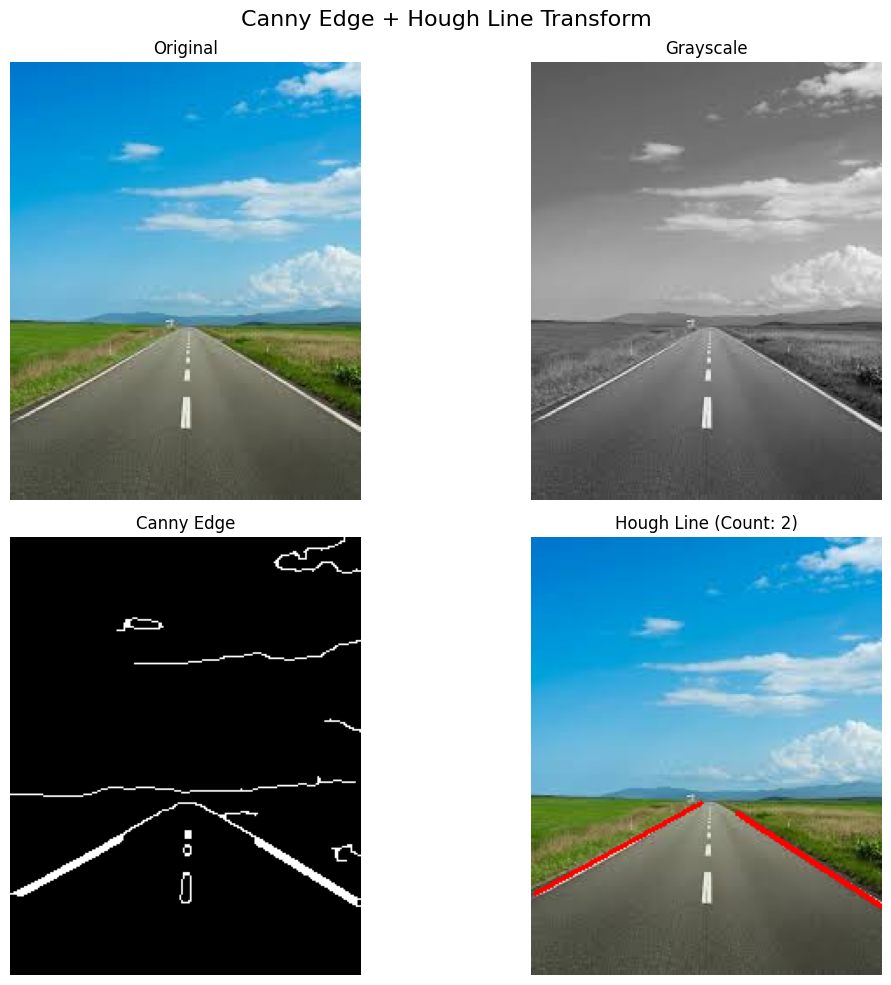

In [37]:
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

def canny_edge_detection(gray_image):
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 1.4)
    edges = cv2.Canny(blurred, threshold1=70, threshold2=150)
    kernels = np.ones((3, 3), dtype=np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernels, iterations=1)
    return edges

def hough_line_detection(edge_image, original_image):
    lines = cv2.HoughLinesP(
        edge_image,
        rho=1,
        theta=np.pi / 180,
        threshold=65,
        minLineLength=80,
        maxLineGap=10
    )

    result = original_image.copy()
    line_count = 0  # ตัวแปรสำหรับเก็บจำนวนเส้น

    if lines is not None:
        line_count = len(lines)  # 1. นับจำนวนเส้นที่เจอ
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return result, line_count # ส่งค่าจำนวนเส้นกลับไปด้วย

def process_image(image_path, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    original, gray = load_and_convert_to_grayscale(image_path)
    if gray is None:
        return

    edges = canny_edge_detection(gray)
    hough_img, count = hough_line_detection(edges, original)

    results = {
        "Original": cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
        "Grayscale": gray,
        "Canny Edge": edges,
        f"Hough Line (Count: {count})": cv2.cvtColor(hough_img, cv2.COLOR_BGR2RGB)
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Canny Edge + Hough Line Transform", fontsize=16)

    for ax, (title, img) in zip(axes.ravel(), results.items()):
        cmap = 'gray' if len(img.shape) == 2 else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"hough_{os.path.basename(image_path)}")
    plt.savefig(save_path)
    plt.show()

if __name__ == "__main__":
    image_path = "C:\\Users\\enjoykubphom\\Documents\\GitHub\\Mini_Visionv1\\img\\line5.jpg"   # เปลี่ยนเป็นรูปของคุณ
    process_image(image_path)

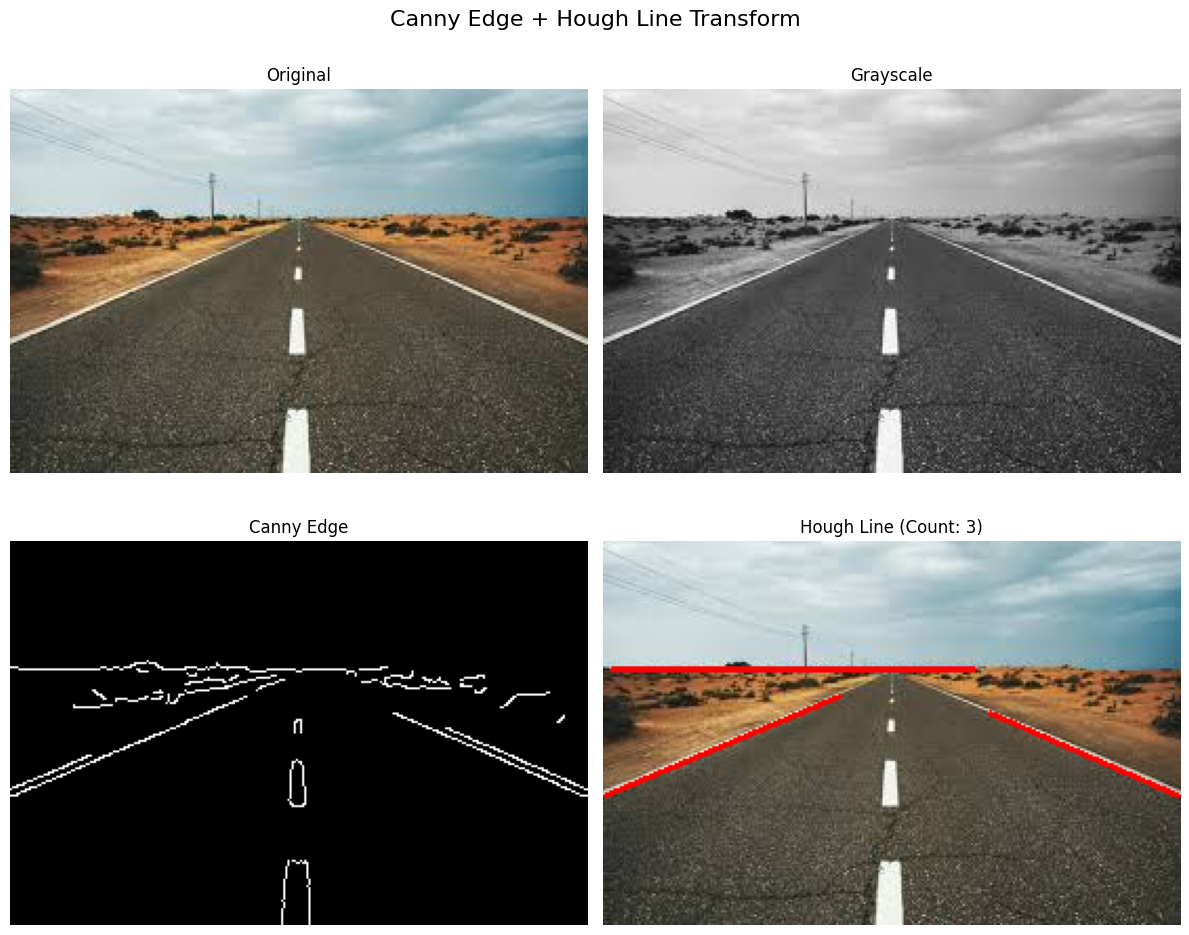

In [32]:
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

def canny_edge_detection(gray_image):
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 1.4)
    edges = cv2.Canny(blurred, threshold1=150, threshold2=200)
    #edges = cv2.Canny(edges, threshold1=100, threshold2=200)
    return edges

def hough_line_detection(edge_image, original_image):
    lines = cv2.HoughLinesP(
        edge_image,
        rho=1,
        theta=np.pi / 180,
        threshold=80,
        minLineLength=80,
        maxLineGap=10
    )

    result = original_image.copy()
    line_count = 0  # ตัวแปรสำหรับเก็บจำนวนเส้น

    if lines is not None:
        line_count = len(lines)  # 1. นับจำนวนเส้นที่เจอ
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return result, line_count # ส่งค่าจำนวนเส้นกลับไปด้วย

def process_image(image_path, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    original, gray = load_and_convert_to_grayscale(image_path)
    if gray is None:
        return

    edges = canny_edge_detection(gray)
    hough_img, count = hough_line_detection(edges, original)

    results = {
        "Original": cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
        "Grayscale": gray,
        "Canny Edge": edges,
        f"Hough Line (Count: {count})": cv2.cvtColor(hough_img, cv2.COLOR_BGR2RGB)
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Canny Edge + Hough Line Transform", fontsize=16)

    for ax, (title, img) in zip(axes.ravel(), results.items()):
        cmap = 'gray' if len(img.shape) == 2 else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"hough_{os.path.basename(image_path)}")
    plt.savefig(save_path)
    plt.show()

if __name__ == "__main__":
    image_path = "C:\\Users\\enjoykubphom\\Documents\\GitHub\\Mini_Visionv1\\img\\line8.jpg"   # เปลี่ยนเป็นรูปของคุณ
    process_image(image_path)

# เช็คพารามิเตอร์เพื่อมาปรับ

In [ ]:
import cv2
import numpy as np

img = cv2.imread(r"C:\Users\enjoykubphom\Documents\GitHub\Mini_Visionv1\img\line4.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.namedWindow("Hough Tune", cv2.WINDOW_NORMAL)

def nothing(x):
    pass

# ---- Trackbars ----
cv2.createTrackbar("Canny Low", "Hough Tune", 50, 300, nothing)
cv2.createTrackbar("Canny High", "Hough Tune", 150, 300, nothing)
cv2.createTrackbar("Kernel", "Hough Tune", 3, 11, nothing)
cv2.createTrackbar("Morph Iter", "Hough Tune", 1, 5, nothing)
cv2.createTrackbar("Theta", "Hough Tune", 180, 360, nothing)
cv2.createTrackbar("Hough Th", "Hough Tune", 80, 200, nothing)
cv2.createTrackbar("Min Len", "Hough Tune", 80, 300, nothing)
cv2.createTrackbar("Max Gap", "Hough Tune", 10, 50, nothing)

while True:
    low = cv2.getTrackbarPos("Canny Low", "Hough Tune")
    high = cv2.getTrackbarPos("Canny High", "Hough Tune")
    k = cv2.getTrackbarPos("Kernel", "Hough Tune")
    it = cv2.getTrackbarPos("Morph Iter", "Hough Tune")
    the = cv2.getTrackbarPos("Theta", "Hough Tune")
    th = cv2.getTrackbarPos("Hough Th", "Hough Tune")
    minL = cv2.getTrackbarPos("Min Len", "Hough Tune")
    gap = cv2.getTrackbarPos("Max Gap", "Hough Tune")

    if k % 2 == 0:
        k += 1
    if the == 0:
        the = 1

    blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)
    edges = cv2.Canny(blurred, threshold1=low, threshold2=high)
    #edges = cv2.Canny(edges, threshold1=100, threshold2=200)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=it)

    lines = cv2.HoughLinesP(
        edges, 1, np.pi / the,
        th, minLineLength=minL, maxLineGap=gap
    )

    result = img.copy()
    if lines is not None:
        for l in lines:
            x1, y1, x2, y2 = l[0]
            cv2.line(result, (x1,y1), (x2,y2), (0,0,255), 2)

    show = np.hstack([
        cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR),
        result
    ])

    cv2.imshow("Hough Tune", show)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC
        break

cv2.destroyAllWindows()
